In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import networkx as nx
import json

In [2]:
def make_bipartite_graph(edges,
                         left_node_color,
                         right_node_color,
                         output_file_path,
                         graph_options = {},
                         left_nodes = None,
                         right_nodes = None,
                         fig_size=(100,100)):
    G = nx.Graph()
    color_map = []
    
    # if no left or right nodes are provided, initialize empty lists to derive them from edges
    assert (left_nodes is None and right_nodes is None) or (left_nodes is not None and right_nodes is not None), "Both sets of nodes must be provided or both must be missing"
    create_nodes_from_edges = left_nodes is None or right_nodes is None
    if create_nodes_from_edges:
        left_nodes, right_nodes = [], []
    
    # add edges to graph
    for edge in edges:
        from_node, to_node = edge[0], edge[1]
        
        # if nodes must be created from edges, add them to the left/right node lists
        if create_nodes_from_edges:
            left_nodes.append(from_node)
            right_nodes.append(to_node)
                
        G.add_edge(from_node, to_node)
        
    # add nodes to graph
    left_nodes = list(set(left_nodes))
    right_nodes = list(set(right_nodes))

    for idx, node in enumerate(left_nodes):
        G.add_node(node, pos=idx)
    for idx, node in enumerate(right_nodes):
        G.add_node(node, pos=idx)

    # add colors to nodes
    for node in G.nodes:
        if node in left_nodes:
            color_map.append(left_node_color)
            continue
            
        color_map.append(right_node_color)
            

    fig, ax = plt.subplots(figsize=fig_size)

    # specify default graph formatting options, passed args can overwrite defaults
    options = {
        "with_labels": True,
        "node_size": 150,
        "node_color": color_map,
        "node_shape": "s",
        "alpha": 0.3,
        "linewidths": 40,
        "arrows": True,
        # options can be passed to overwrite above defaults
        **graph_options
    }
    
    nx.draw(
        **options,
        ax=ax,
        G=G,
        pos=nx.nx.bipartite_layout(G, left_nodes),
    )
    
    # save graph into image and show result
    plt.savefig(output_file_path)
    plt.show()
    
    return G

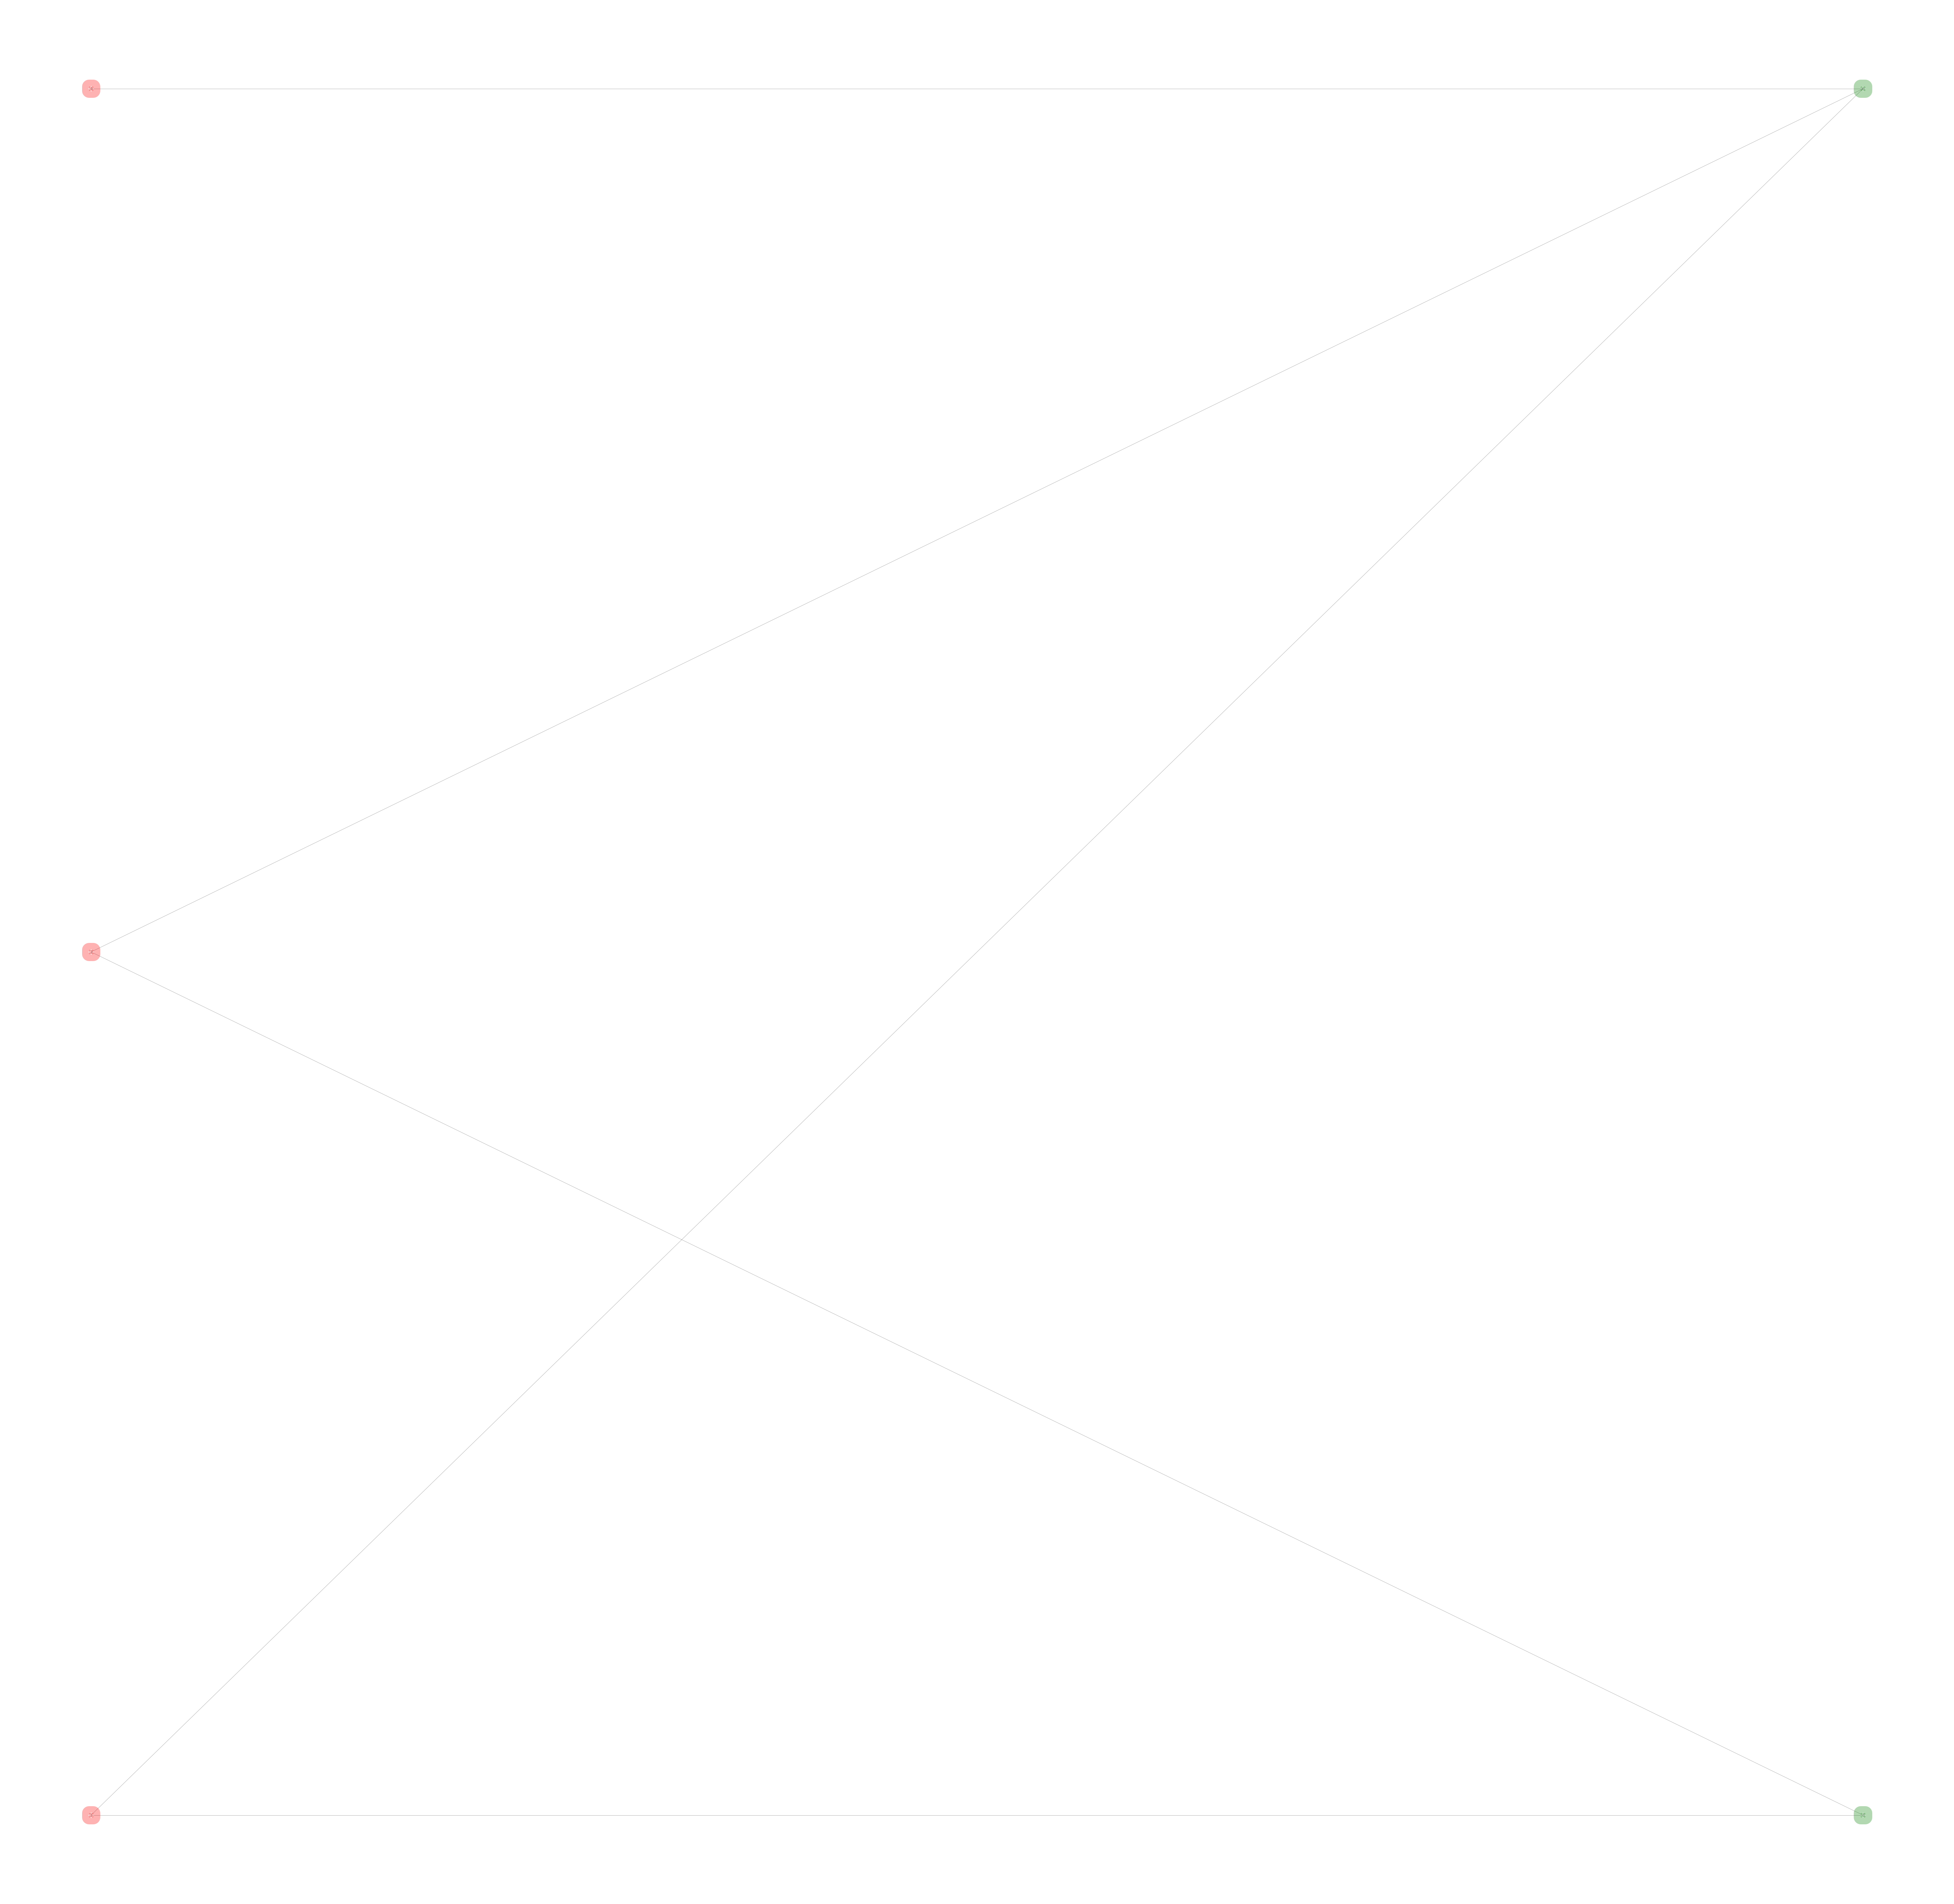

In [7]:
make_bipartite_graph([(1,3), (2,6), (4,6), (2,3),(1,6)], left_node_color="red", right_node_color="green", output_file_path='graph.png')